In [0]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import SGD
# load train and test dataset
def load_dataset():
  (trainX,trainY),(testX,testY) = fashion_mnist.load_data()
  trainX = trainX.reshape((trainX.shape[0],28,28,1))
  testX = testX.reshape((testX.shape[0],28,28,1))
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX,trainY,testX,testY
# scale pixels
def prep_pixels(train,test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm = train_norm/255.0
  test_norm = test_norm/255
  return train_norm,test_norm
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',input_shape = (28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100,activation='relu',kernel_initializer = 'he_uniform'))
  model.add(Dense(10,activation = 'softmax'))
  opt = SGD(lr=0.01,momentum = 0.9)
  model.compile(optimizer = opt,loss = 'categorical_crossentropy',metrics = ['accuracy'])
  return model
def evaluate_model(model,dataX,dataY,n_folds = 5):
  scores,histories = list(),list()
  kfold = KFold(n_folds,shuffle = True,random_state = 1)
  for train_ix,test_ix in kfold.split(dataX):
    trainX,trainY,testX,testY = dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
    history = model.fit(trainX,trainY,epochs =10,batch_size = 32,validation_data = (testX,testY),verbose = 0)
    _,acc = model.evaluate(testX,testY,verbose = 0)
    print('>%.3f'%(acc*100.0))
    scores.append(acc)
    histories.append(history)
  return scores,histories
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    pyplot.subplot(211)
    pyplot.title('cross entropy loss')
    pyplot.plot(histories[i].history['loss'],color='blue',label = 'train')
    pyplot.plot(histories[i].history['val_loss'],color = 'orange',label = 'test')
    pyplot.subplot(212)
    pyplot.title('classification accuracy')
    pyplot.plot(histories[i].history['val_acc'],color= 'orange',label = 'test')
  pyplot.show()
def run_test_harness():
  trainX,trainY,testX,testY = load_dataset()
  trainX,testX  = prep_pixels(trainX,testX)
  model = define_model()
  scores,histories = evaluate_model(model,trainX,trainY)
  summarize_diagnostics(histories)
  summarize_performance(scores)
run_test_harness()


KeyboardInterrupt: ignored

>90.133
>94.458
>97.883
>99.742
>99.983


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


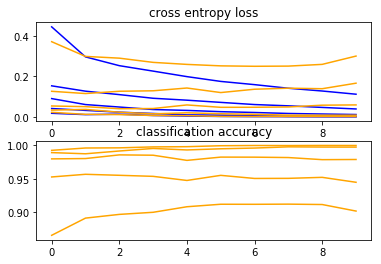

NameError: ignored

In [0]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import SGD
# load train and test dataset
def load_dataset():
  (trainX,trainY),(testX,testY) = fashion_mnist.load_data()
  trainX = trainX.reshape((trainX.shape[0],28,28,1))
  testX = testX.reshape((testX.shape[0],28,28,1))
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX,trainY,testX,testY
# scale pixels
def prep_pixels(train,test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm = train_norm/255.0
  test_norm = test_norm/255
  return train_norm,test_norm
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',input_shape = (28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100,activation='relu',kernel_initializer = 'he_uniform'))
  model.add(Dense(10,activation = 'softmax'))
  opt = SGD(lr=0.01,momentum = 0.9)
  model.compile(optimizer = opt,loss = 'categorical_crossentropy',metrics = ['accuracy'])
  return model
def evaluate_model(model,dataX,dataY,n_folds = 5):
  scores,histories = list(),list()
  kfold = KFold(n_folds,shuffle = True,random_state = 1)
  for train_ix,test_ix in kfold.split(dataX):
    trainX,trainY,testX,testY = dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
    history = model.fit(trainX,trainY,epochs =10,batch_size = 32,validation_data = (testX,testY),verbose = 0)
    _,acc = model.evaluate(testX,testY,verbose = 0)
    print('>%.3f'%(acc*100.0))
    scores.append(acc)
    histories.append(history)
  return scores,histories
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    pyplot.subplot(211)
    pyplot.title('cross entropy loss')
    pyplot.plot(histories[i].history['loss'],color='blue',label = 'train')
    pyplot.plot(histories[i].history['val_loss'],color = 'orange',label = 'test')
    pyplot.subplot(212)
    pyplot.title('classification accuracy')
    pyplot.plot(histories[i].history['val_acc'],color= 'orange',label = 'test')
  pyplot.show()
def run_test_harness():
  trainX,trainY,testX,testY = load_dataset()
  trainX,testX  = prep_pixels(trainX,testX)
  model = define_model()
  scores,histories = evaluate_model(model,trainX,trainY)
  summarize_diagnostics(histories)
  summarize_performance(scores)
run_test_harness()
